In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from utils.training import plot_log

Using TensorFlow backend.


In [2]:
experiments = !ls -1 ./checkpoints
print(*['%3i %s' % (i, v) for i, v in enumerate(experiments.list)], sep='\n')

  0 201806021007_dsodsl512_synthtext
  1 201806162129_crnn_lstm_synthtext
  2 201807091503_dsodtbpp512fl_synthtext
  3 201809231008_sl512_synthtext
  4 201904090148_crnn_lstm_cocotext_pretrained_v13
  5 201904231209_crnn_lstm_ksignboard_v1
  6 201904231231_crnn_lstm_ksignboard_v2
  7 201904231442_crnn_lstm_ksignboard_v3
  8 201904231507_crnn_lstm_ksignboard_v3
  9 201904231525_crnn_lstm_ksignboard_v3
 10 201904231531_crnn_lstm_ksignboard_v3
 11 201904231556_crnn_lstm_ksignboard_v4
 12 201904231559_crnn_lstm_ksignboard_v4
 13 201904231652_crnn_ksignboard_v4
 14 201904231654_crnn_ksignboard_v4
 15 201904231805_crnn_ksignboard_v4
 16 201904231806_crnn_ksignboard_v5
 17 201904232129_crnn_ksignboard_v6
 18 201904232135_crnn_ksignboard_v6
 19 201904232253_crnn_ksignboard_v7
 20 201904232300_crnn_ksignboard_v7
 21 201904232301_crnn_ksignboard_v7
 22 201904241021_crnn_ksignboard_v8
 23 201904241022_crnn_ksignboard_v8
 24 201904241252_crnn_ksignboard_v9
 25 201904242154_crnn_ksignboard_v10
 26 

### Log

sl512_ksignboard_ex3
{'seg_loc_loss', 'seg_accuracy', 'cross_link_precision', 'inter_link_precision', 'seg_precision', 'link_conf_loss', 'seg_fmeasure', 'link_precision', 'inter_link_fmeasure', 'loss', 'inter_link_accuracy', 'link_accuracy', 'seg_recall', 'inter_link_recall', 'cross_link_conf_loss', 'inter_link_conf_loss', 'link_fmeasure', 'cross_link_fmeasure', 'seg_conf_loss', 'cross_link_recall', 'num_neg_seg', 'num_pos_seg', 'link_recall', 'cross_link_accuracy'}
time per epoch 0.0 h


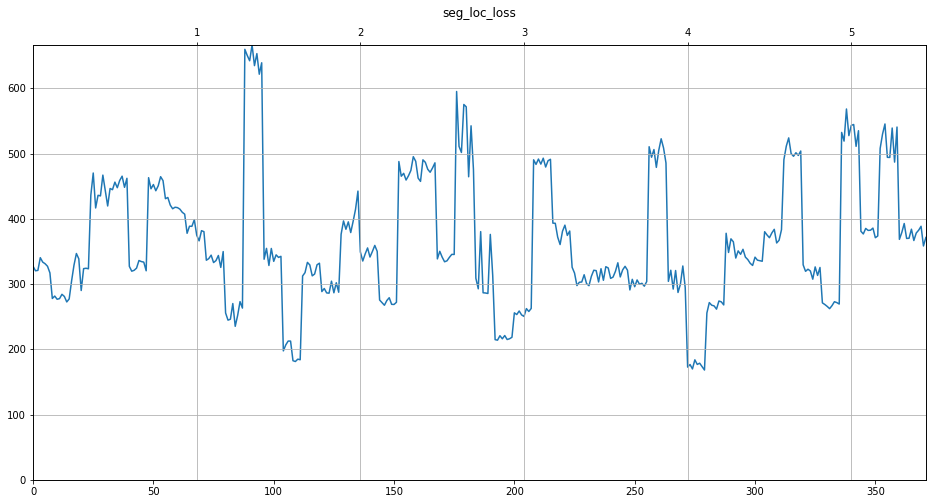

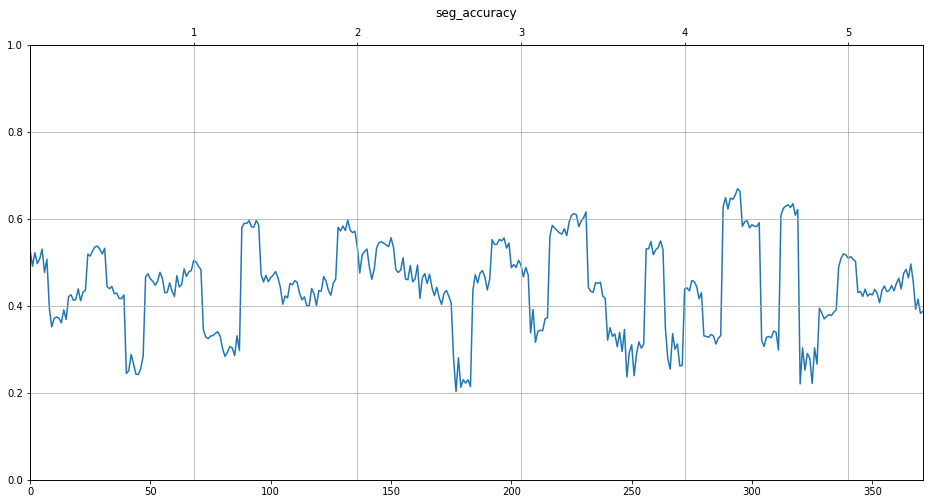

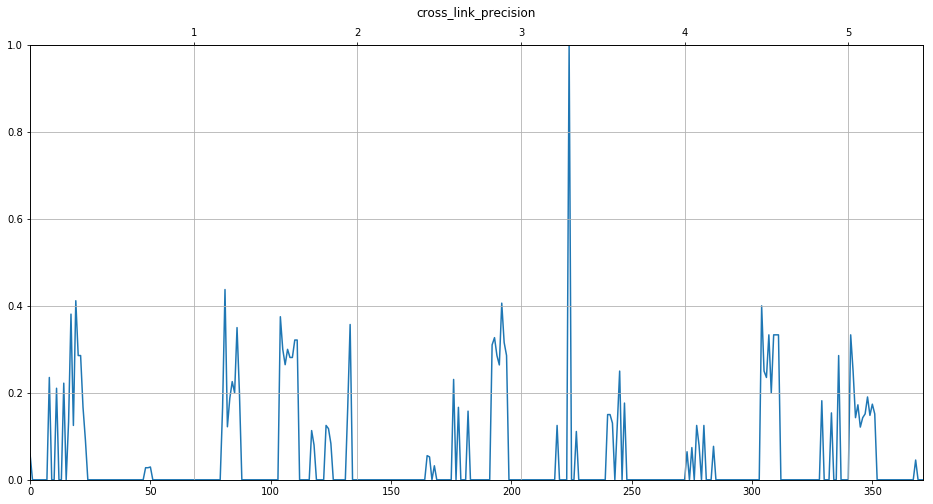

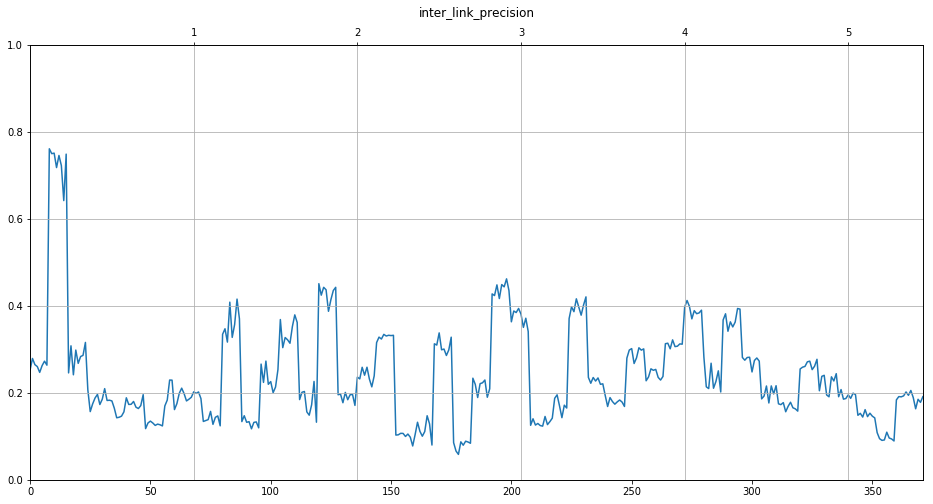

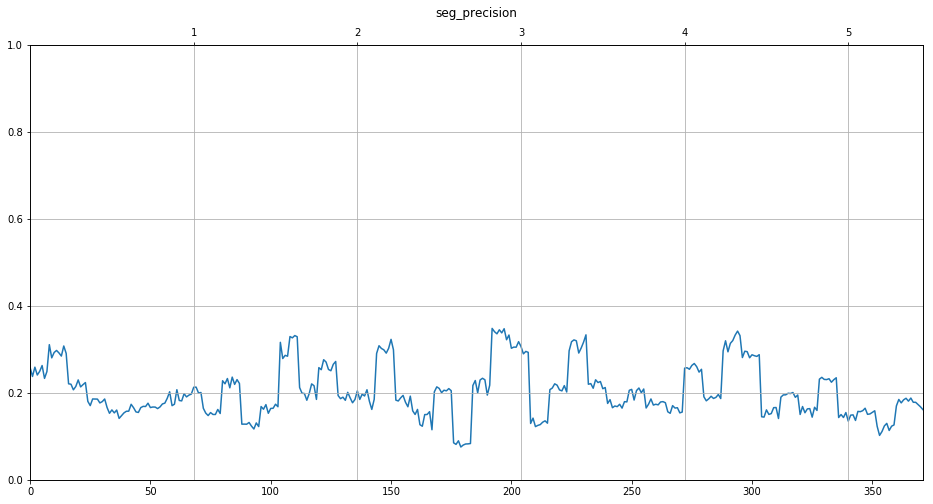

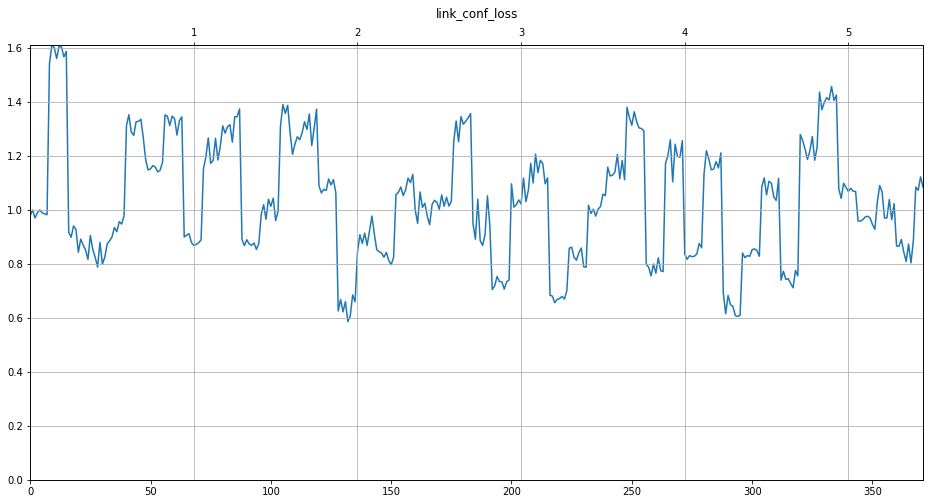

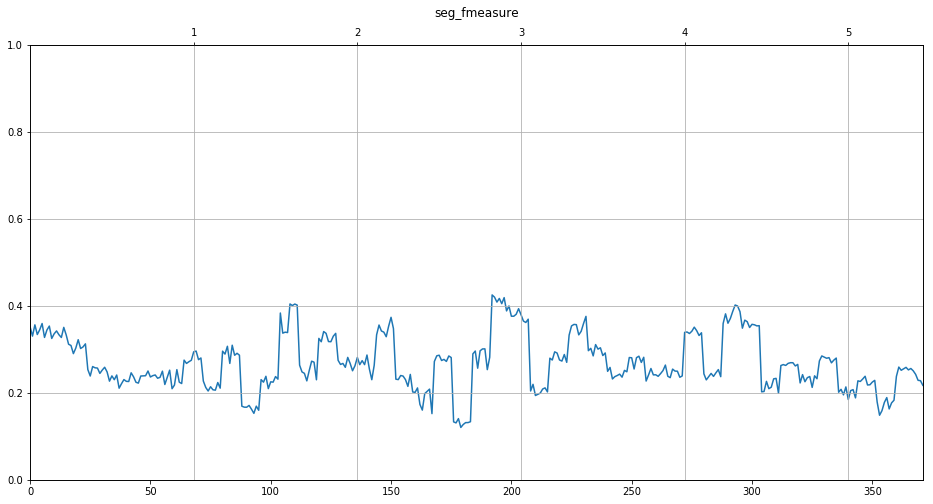

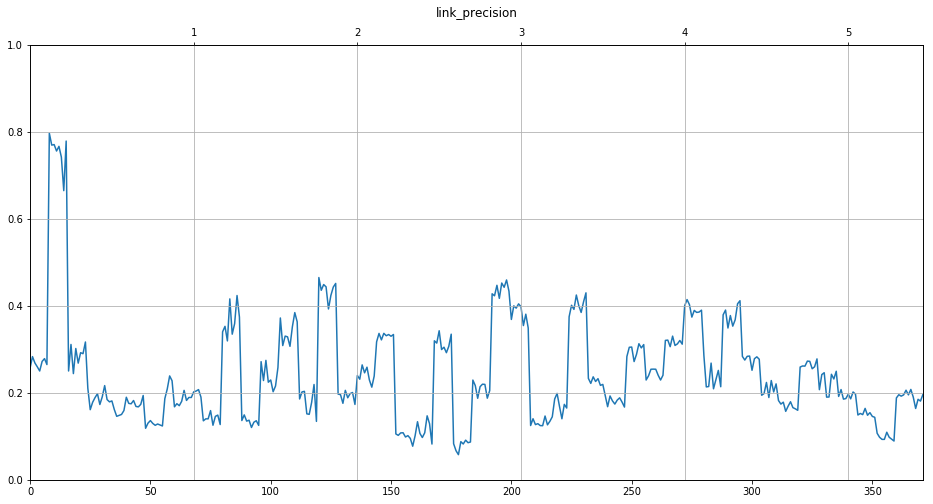

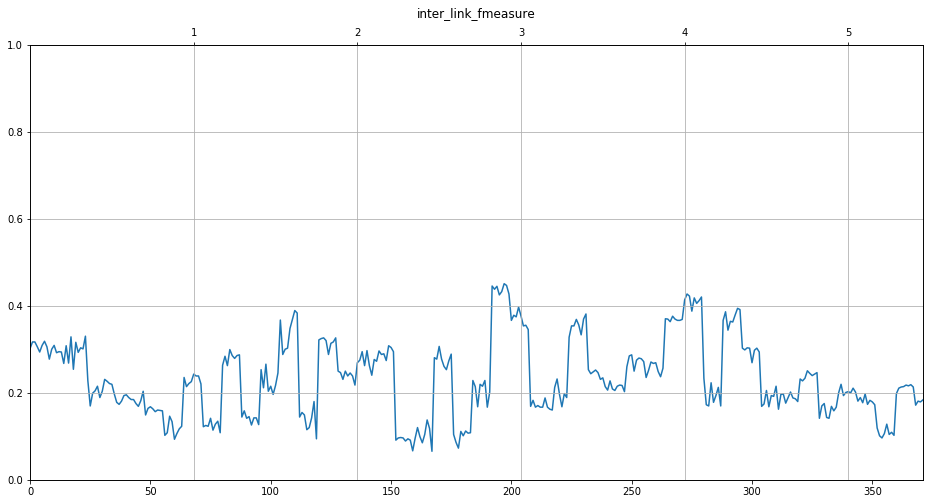

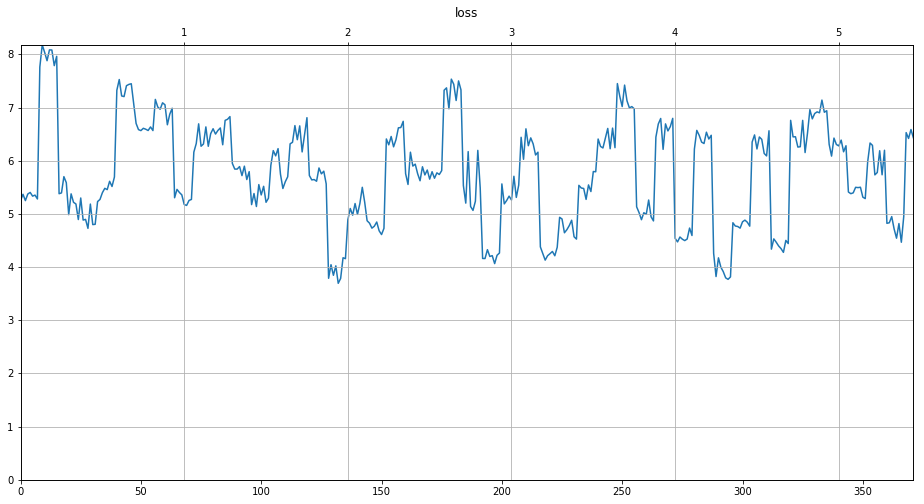

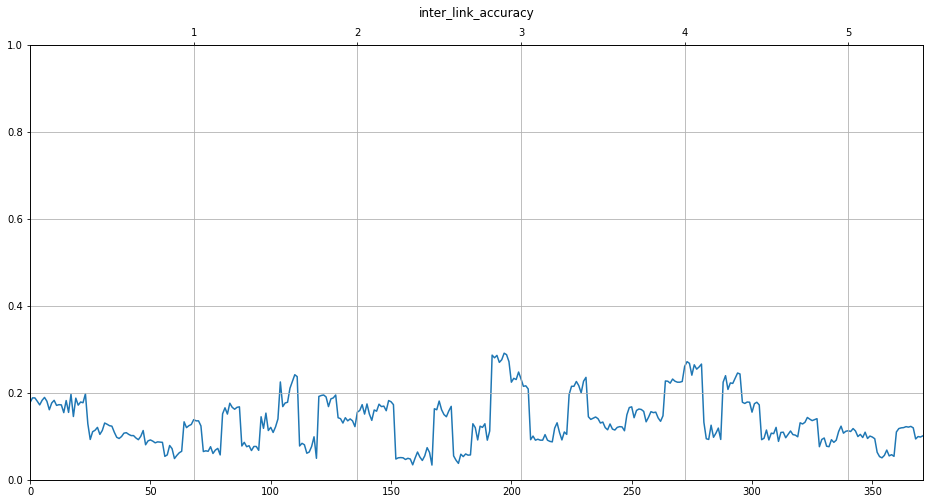

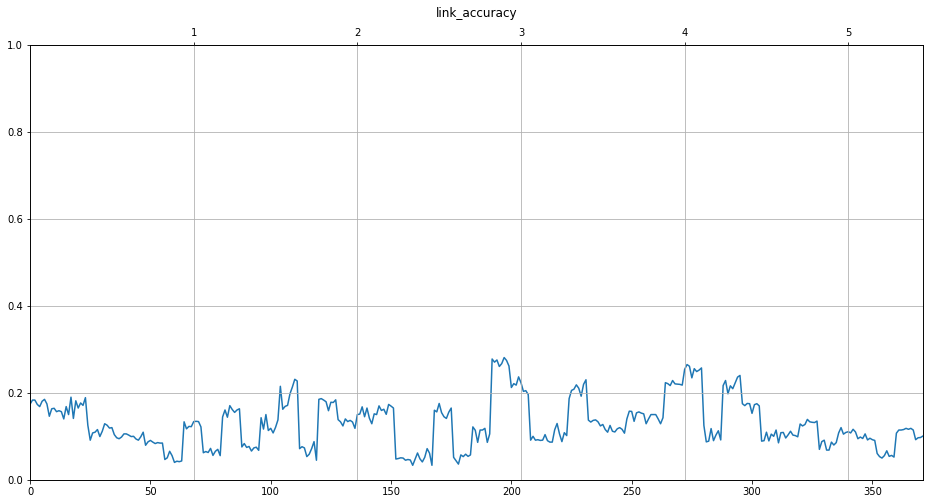

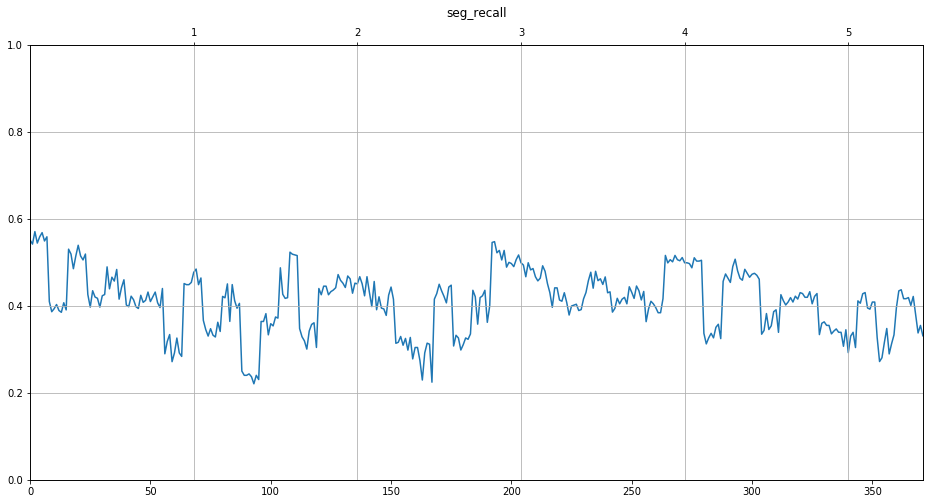

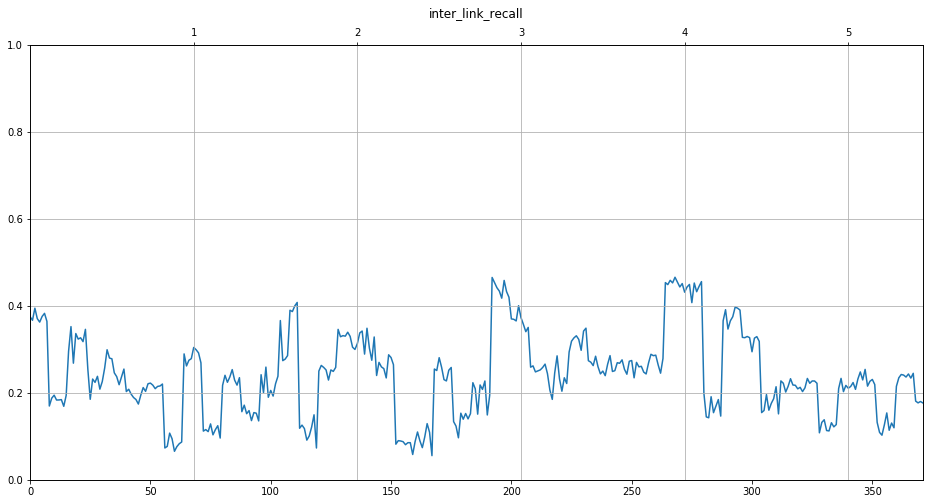

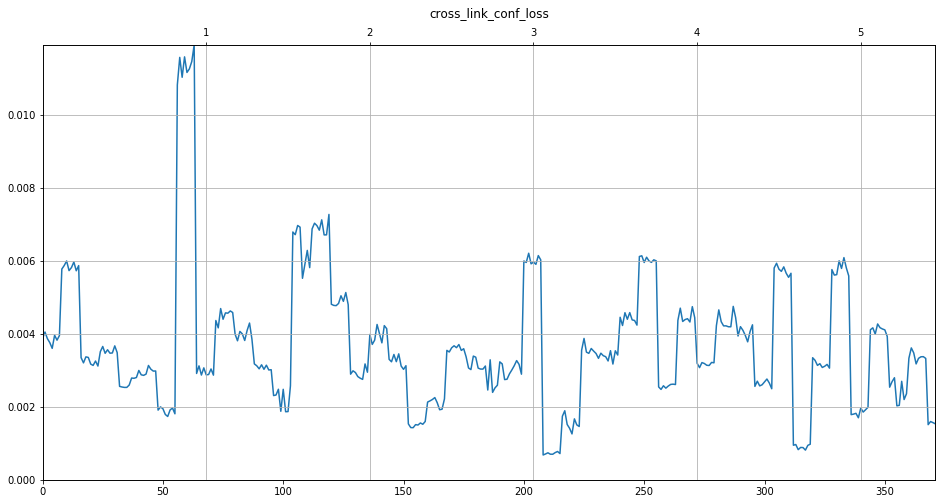

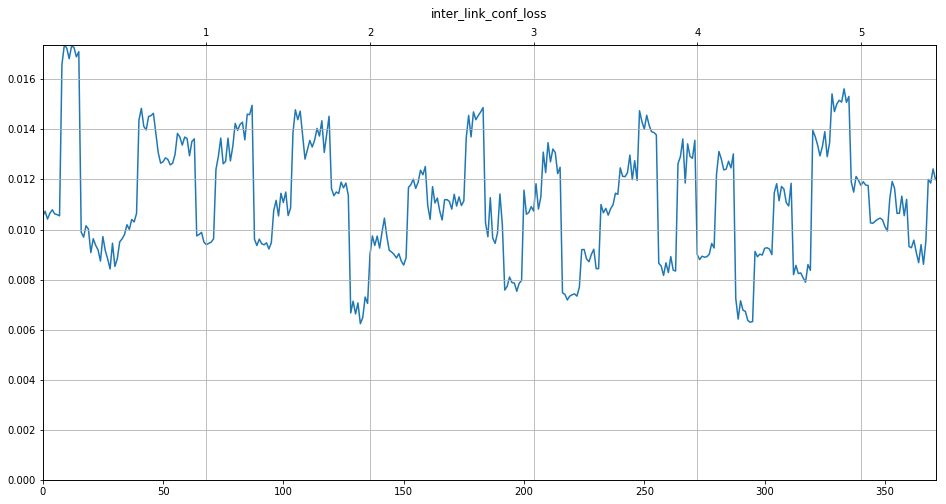

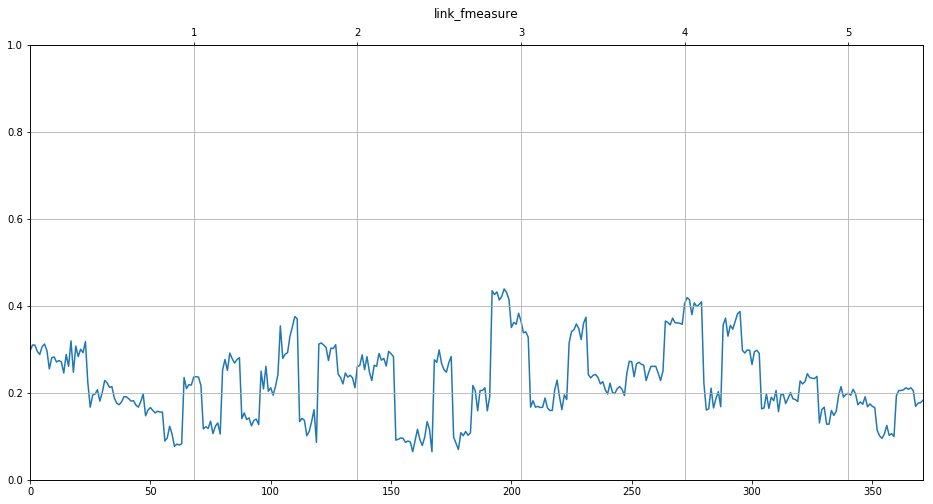

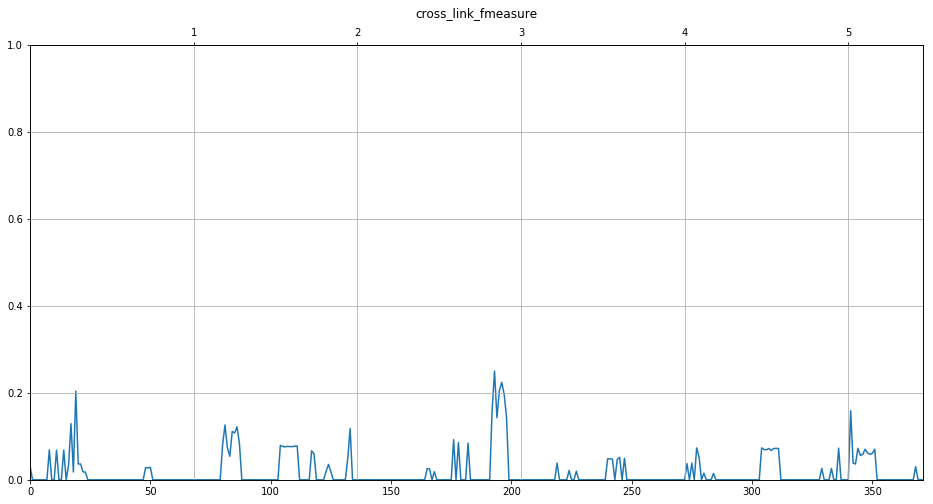

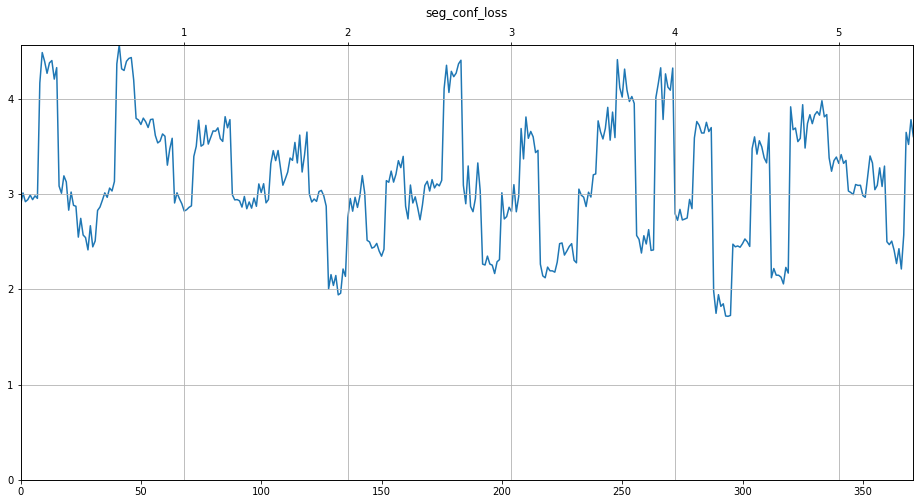

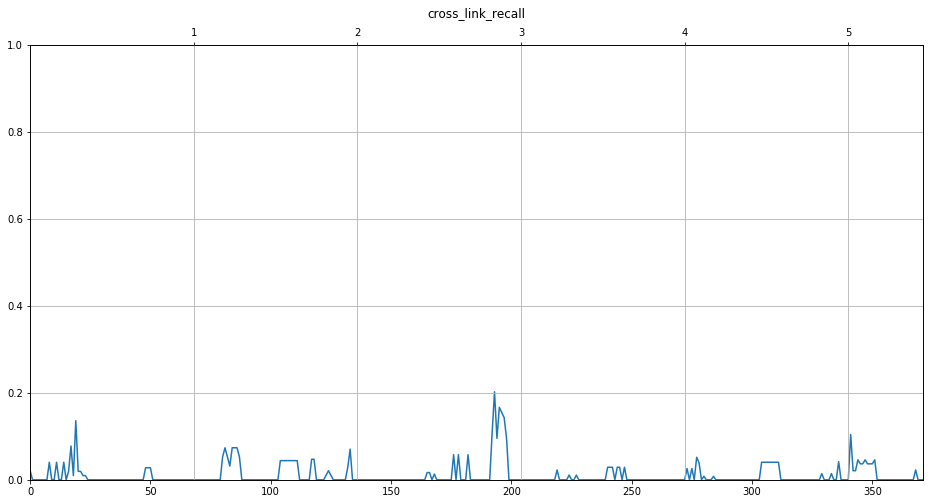

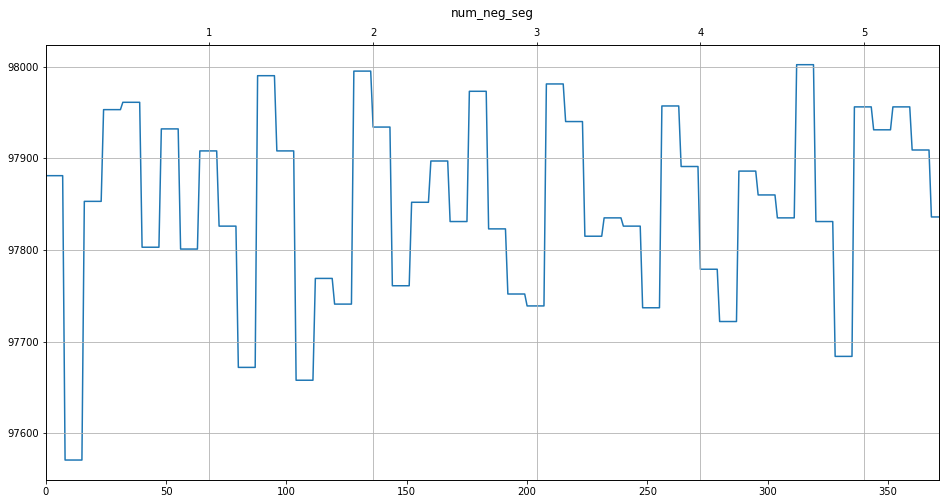

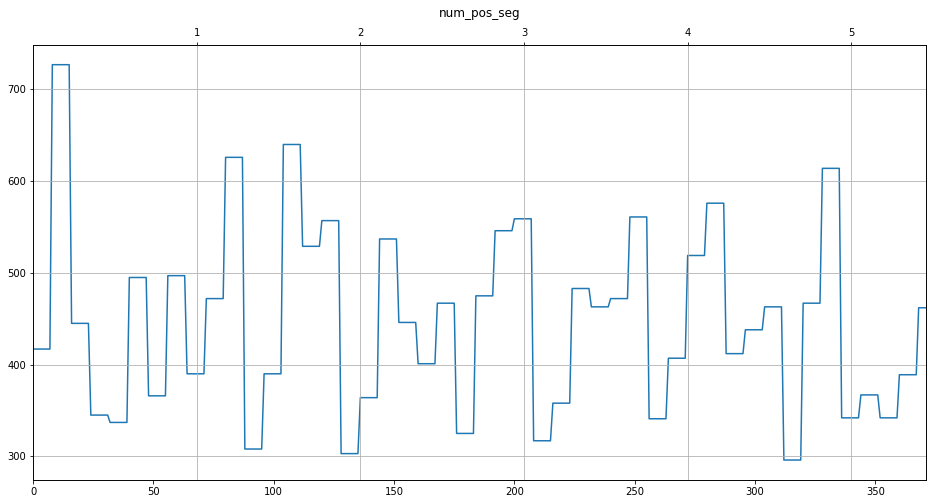

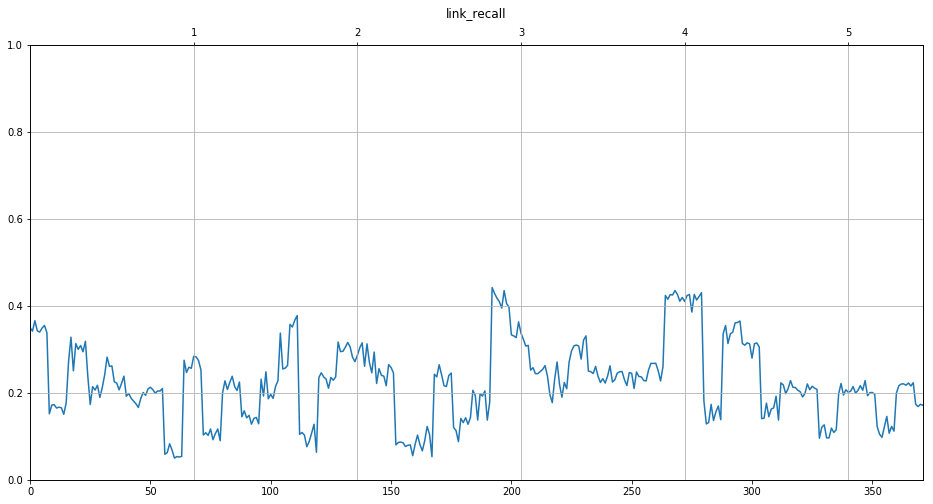

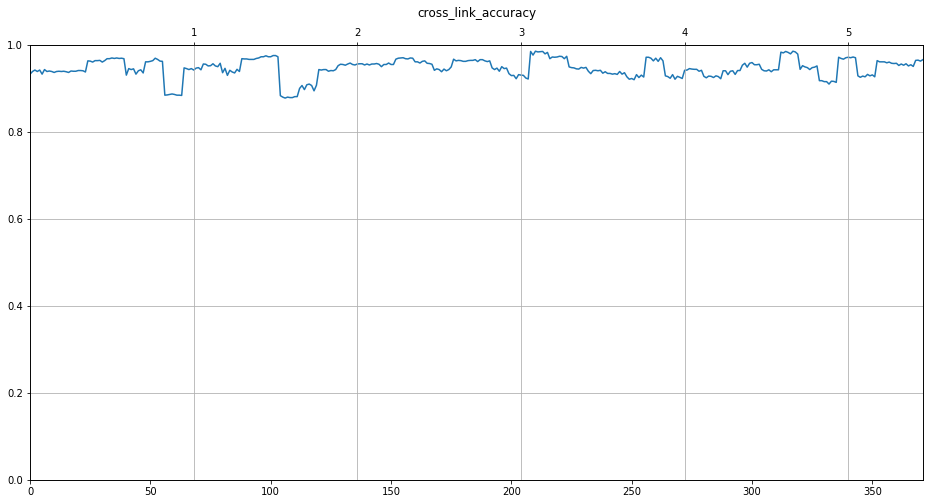

In [3]:
checkdir = experiments[-2]

names = [
    'loss',
    'lr', 
    'pos_conf_loss', 'pos_loc_loss', 'neg_conf_loss',
    # SegLink
    'seg_conf_loss', 'seg_loc_loss', 'link_conf_loss',
    #'pos_seg_conf_loss', 'neg_seg_conf_loss', 'pos_link_conf_loss', 'neg_link_conf_loss', 
    #'num_pos_seg', 'num_neg_seg', 
    #'num_pos_link', 'num_neg_link',
    'seg_fmeasure', 'link_fmeasure',
    #'seg_precsion', 'link_precision', 
    #'seg_recall','link_recall',
    #'seg_accuracy', 'link_accuracy',
    #'inter_link_conf_loss', 'inter_link_precision', 'inter_link_recall', 'inter_link_accuracy', 'inter_link_fmeasure', 
    #'cross_link_conf_loss', 'cross_link_precision', 'cross_link_recall', 'cross_link_accuracy', 'cross_link_fmeasure', 
    # TBPP
    'conf_loss', 'loc_loss',
    'precision', 'recall', 
    'fmeasure',
]
names = None

limits = [100, None]
#limits = [0, 10000]
limits = None

plot_log(checkdir, names, limits, window_length=1000)

### Compare Log

In [ ]:
# SegLink

checkdir1 = experiments[-2]
checkdir2 = experiments[-1]

names = [
    'loss',
    #'pos_conf_loss', 'pos_loc_loss', 'neg_conf_loss',
    'seg_conf_loss', 'pos_seg_conf_loss', 'neg_seg_conf_loss',
    'seg_loc_loss',
    #'link_conf_loss', 'pos_link_conf_loss', 'neg_link_conf_loss',
    'inter_link_conf_loss', 'cross_link_conf_loss',
    
    'seg_fmeasure', 'link_fmeasure',
    #'seg_precision', 'seg_recall',
    #'link_precision', 'link_recall',
]

#limits = [200, None]
#limits = None

plot_log(checkdir1, names, limits, window_length=1000, log_dir_compare=checkdir2)

In [ ]:
# TextBoxes++

checkdirs = !ls -1 ./checkpoints/ | grep tbpp
print(checkdirs.n, '\n')

checkdir1, checkdir2 = checkdirs[0], checkdirs[3]

plot_log(checkdir1, 
         ['loss', 'conf_loss', 'loc_loss', 'precision', 'recall', 'fmeasure'], 
         [0,None], log_dir_compare=checkdir2, window_length=2500)

### Playground

In [ ]:
import pandas as pd

df = pd.DataFrame.from_csv('./checkpoints/'+checkdir+'/log.csv')

In [ ]:
%%timeit
df = pd.DataFrame.from_csv('./checkpoints/'+checkdir+'/log.csv')

# json: 8.67 s ± 30.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# csv:  1.93 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [ ]:
fstr = '%-40s %-6s %-6s %-6s %14s %14s'
print(fstr % ('name', 'len', 'nan', 'inf', 'min', 'max'))
for k,v in df.items():
    print(fstr % (
        k, 
        len(v),
        np.any(np.isnan(v)), 
        np.any(np.logical_not(np.isfinite(v))),
        round(np.min(v), 6),
        round(np.max(v), 6),
    ))

In [ ]:
plt.figure()
k = 'loss'
#k = 'fmeasure'
#k = 'recall'
#plt.plot(d['iteration'], d[k])
window_length = 20
w = np.hanning(window_length)
wh = int(window_length/2)
x = np.array(df['iteration'])[wh-1:-wh]
y = np.convolve(w/w.sum(), np.array(df[k]), mode='valid')
plt.plot(x, y)
#plt.ylim([0,0.5])
plt.grid()
plt.show()